In [13]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors


## El archivo sample.tif contiene 3 bandas:

1. Azul (Banda 1)
2. Verde (Banda 2)
3. Rojo (Banda 3)


In [3]:
filename = "sample.tif"

with rasterio.open(filename) as src:
    band_blue = src.read(1)
    band_green = src.read(2)
    band_red = src.read(3)

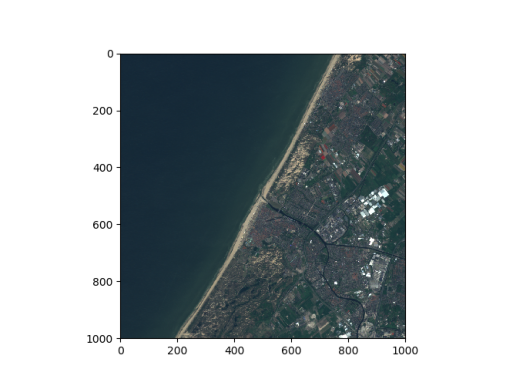

In [6]:
image_file = "sample.png"
img = mpimg.imread(image_file)

plt.imshow(img)
plt.axis("off")
plt.show()

## Calculo del NDVI

La fórmula para calcular el NDVI (Índice de Vegetación de Diferencia Normalizada) a partir de las bandas azul y verde es la siguiente:

$
NDVI = \frac{{band\_green.astype(float) - band\_blue.astype(float)}}{{band\_green + band\_blue}}
$


In [7]:
np.seterr(divide='ignore', invalid='ignore')

ndvi = (band_green.astype(float) - band_blue.astype(float)) / (band_green + band_blue)

In [8]:
print(np.nanmin(ndvi))
print(np.nanmax(ndvi))

-0.6865965074592344
0.406907502977372


In [9]:
meta = src.meta
print(meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1001, 'height': 1001, 'count': 3, 'crs': CRS.from_epsg(32631), 'transform': Affine(10.0, 0.0, 590520.0,
       0.0, -10.0, 5790630.0)}


In [10]:
ndvi_dtype = ndvi.dtype
print(ndvi_dtype)

float64


In [12]:
kwargs = meta
kwargs.update(dtype=ndvi_dtype)

kwargs.update(count=1)

with rasterio.open('ndvi.tif', 'w', **kwargs) as dst:
    dst.write(ndvi, 1)

In [14]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):

        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

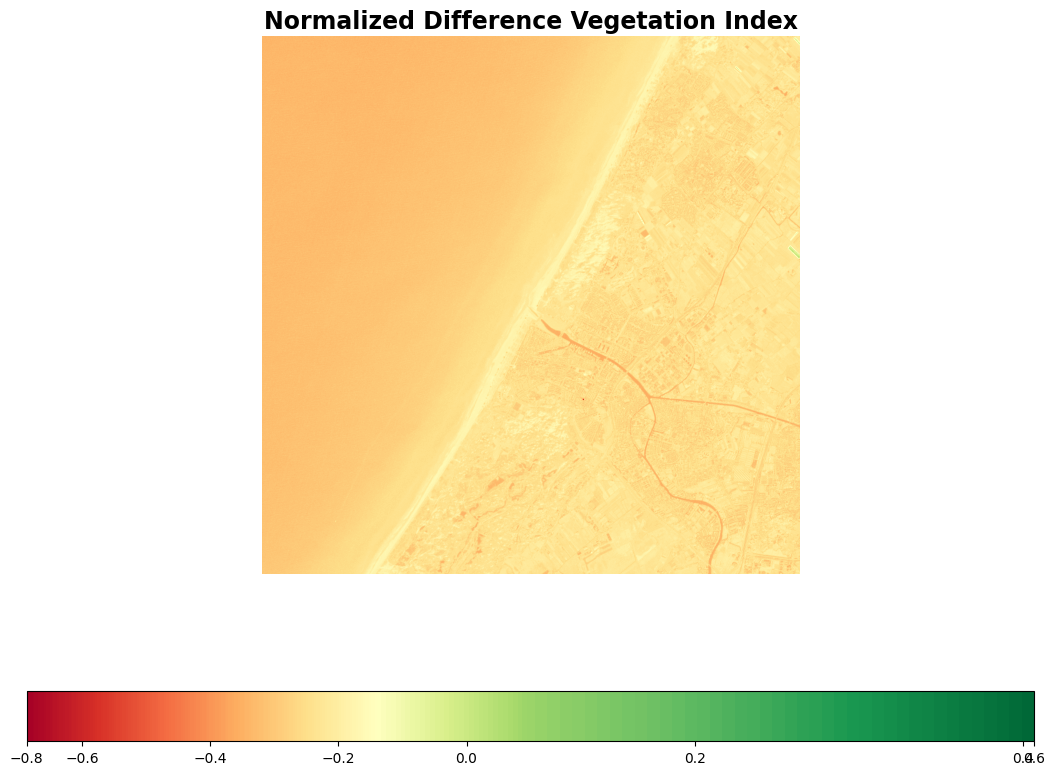

In [15]:
min = np.nanmin(ndvi)
max = np.nanmax(ndvi)
mid = 0.1

colormap = plt.cm.RdYlGn
norm = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)

cbar_plot = ax.imshow(ndvi, cmap=colormap, norm=norm)

ax.axis('off')

ax.set_title('Normalized Difference Vegetation Index', fontsize=17, fontweight='bold')

cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

plt.show()

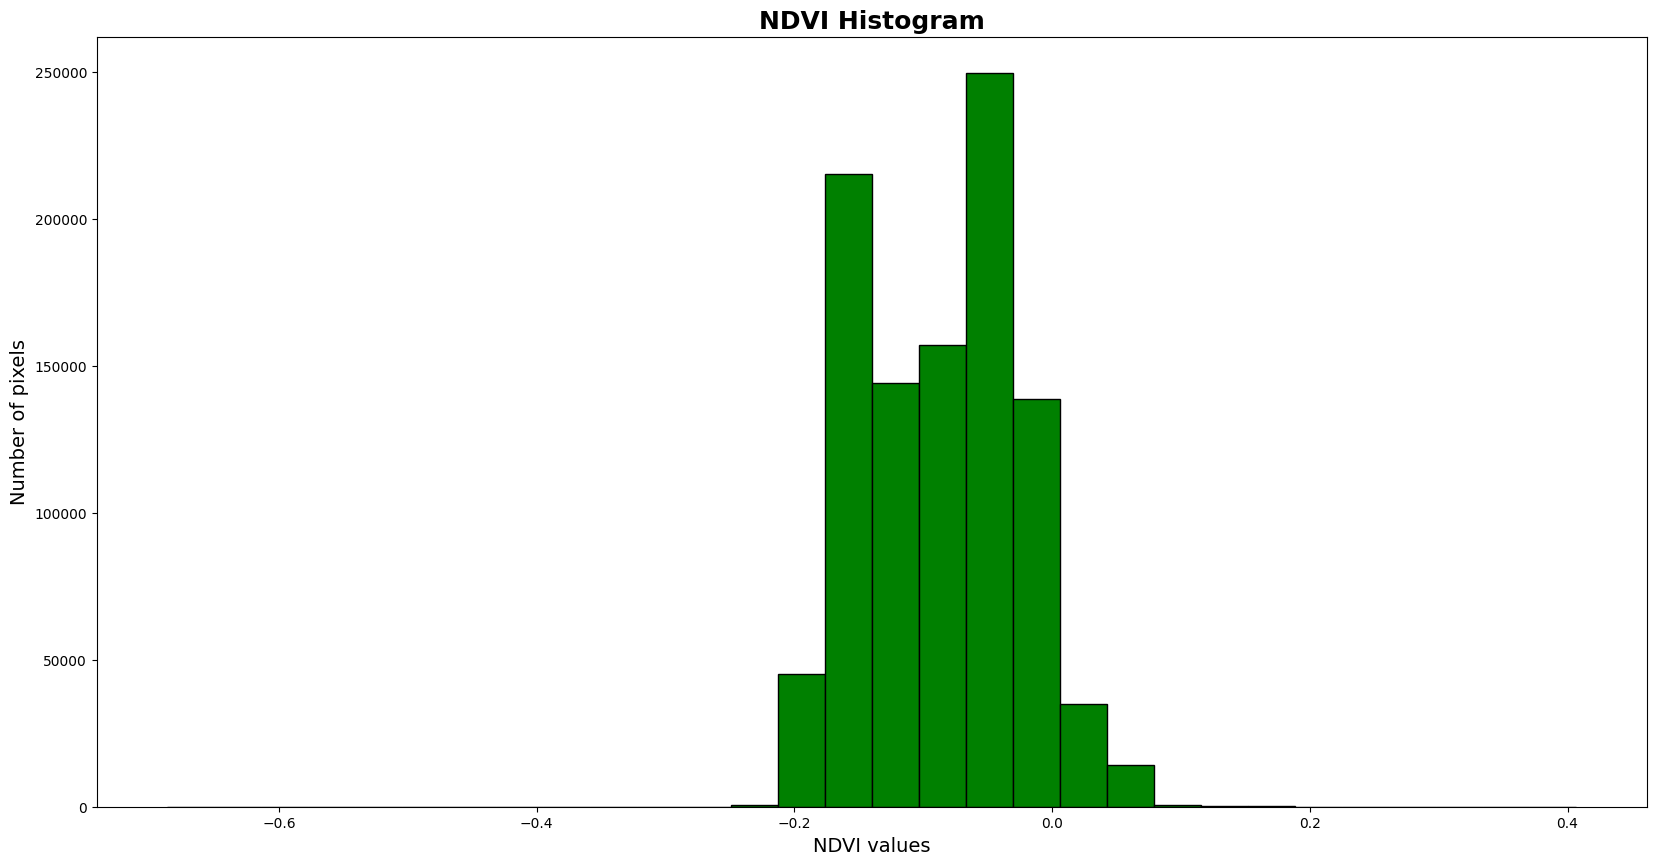

In [16]:
fig2 = plt.figure(figsize=(20,10))

ax = fig2.add_subplot(111)

plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)

x = ndvi[~np.isnan(ndvi)]
color = 'g'
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')

plt.show()